In [1]:
!gdown --id 1TJ8QSuM2P9_U744IBKU9wiJm-oawmePt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TJ8QSuM2P9_U744IBKU9wiJm-oawmePt
From (redirected): https://drive.google.com/uc?id=1TJ8QSuM2P9_U744IBKU9wiJm-oawmePt&confirm=t&uuid=ea6ed677-0458-4ebb-9514-448494ecc377
To: /content/train.csv
100% 184M/184M [00:06<00:00, 30.2MB/s]


In [2]:
!gdown --id 1w-7A76SxqhgGlEMOOhTlDSoGSSeui5fI

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1w-7A76SxqhgGlEMOOhTlDSoGSSeui5fI
To: /content/test.csv
100% 10.7k/10.7k [00:00<00:00, 20.1MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [6]:
df.shape

(57477, 9)

In [7]:
df.head(3)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1


## Models Exploration

In [8]:
concat_series = pd.concat([df['model_a'], df['model_b']])
# Create a new DataFrame
models = pd.DataFrame(concat_series, columns=['model'])

print(models)

                    model
0      gpt-4-1106-preview
1               koala-13b
2      gpt-3.5-turbo-0613
3        llama-2-13b-chat
4               koala-13b
...                   ...
57472            claude-1
57473    llama-2-13b-chat
57474          alpaca-13b
57475      tulu-2-dpo-70b
57476  gpt-4-1106-preview

[114954 rows x 1 columns]


In [9]:
models

,model
0,gpt-4-1106-preview
1,koala-13b
2,gpt-3.5-turbo-0613
3,llama-2-13b-chat
4,koala-13b
...,...
57472,claude-1
57473,llama-2-13b-chat
57474,alpaca-13b
57475,tulu-2-dpo-70b


In [10]:
models_value_counts = models.value_counts()

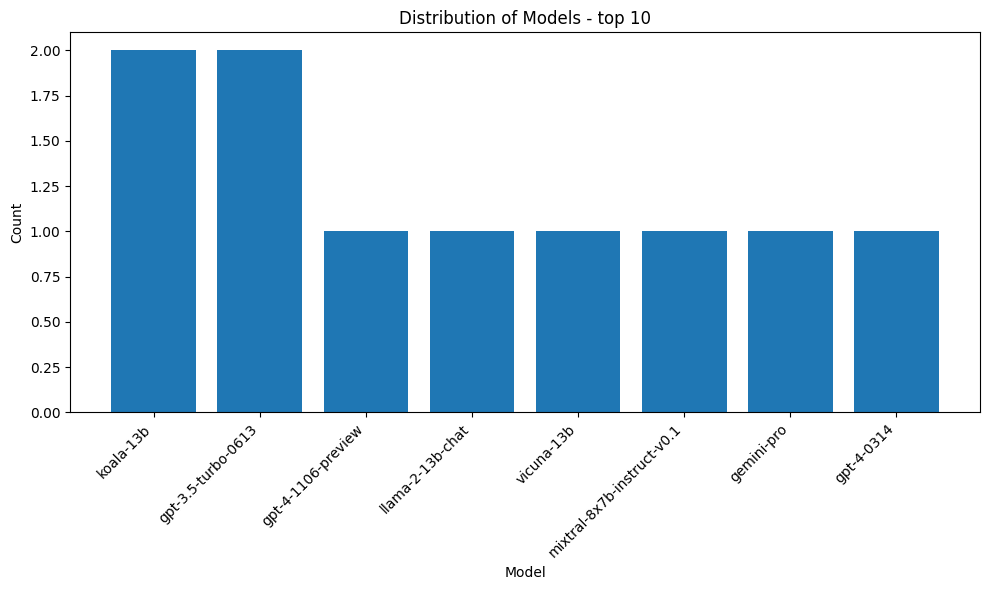

In [23]:


import matplotlib.pyplot as plt
model_counts = models['model'].head(10).value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_counts.index, model_counts.values)
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Distribution of Models - top 10")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
top_15_models = models.value_counts().head(15)
top_15_models

,count
model,
gpt-4-1106-preview,7387
gpt-3.5-turbo-0613,7083
gpt-4-0613,6165
claude-2.1,5583
claude-instant-1,4136
gpt-4-0314,4122
claude-1,3978
vicuna-33b,3720
mixtral-8x7b-instruct-v0.1,3545


## Classes Exploration

In [13]:
winning_signals = df[['winner_model_a', 'winner_model_b', 'winner_tie']].values
winning_signals

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [14]:
winning_signals.sum() # same as the number of rows - this means we have only one 1 and two 0 per row in the training data

57477

In [15]:
winning_signals = np.argmax(winning_signals, axis=1)

In [16]:
winning_signals #0 means model a wins - 1 means model b wins - 2 means a tie

array([0, 1, 2, ..., 0, 1, 0])

In [17]:
len(winning_signals)

57477

In [18]:
winning_df = df.copy()

In [19]:
winning_df['winning_signal'] = winning_signals

In [20]:
winning_value_counts = winning_df['winning_signal'].value_counts()
winning_value_counts

,count
winning_signal,
0,20064
1,19652
2,17761


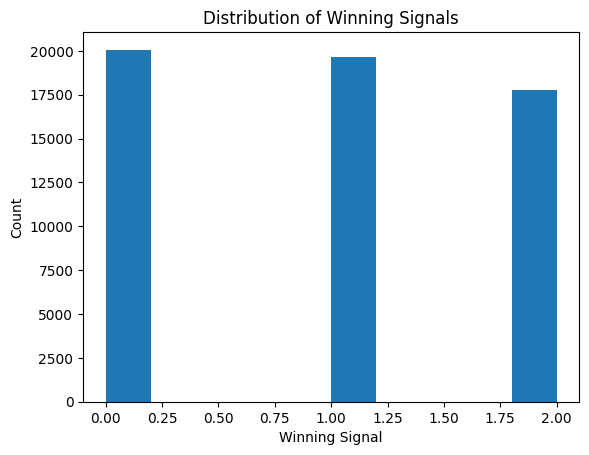

In [21]:
plt.hist(winning_df['winning_signal'])
plt.xlabel('Winning Signal')
plt.ylabel('Count')
plt.title('Distribution of Winning Signals')
plt.show()

We can see that we have balanced classes